#  The Titanic Dataset: A Step-by-Step Guide to Predicting Survival | 0.77033

## Step1. Data Collection
📚 pandas: for data manipulation and analysis.

In [1]:
import pandas as pd
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## Step2. Data Exploration
By using `info()` I can find out how many columns there are, and what their data types are.

In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


There're 12 columns

❔ How many missing values are there in each column?

In [3]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The columns `Age`, `Cabin`, and `Mounted` have missing values.

By using `head()` can see the top 5 first rows of data frame.

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


❔ How many people died?

📚 seaborn: for data visualization

<Axes: xlabel='Survived', ylabel='count'>

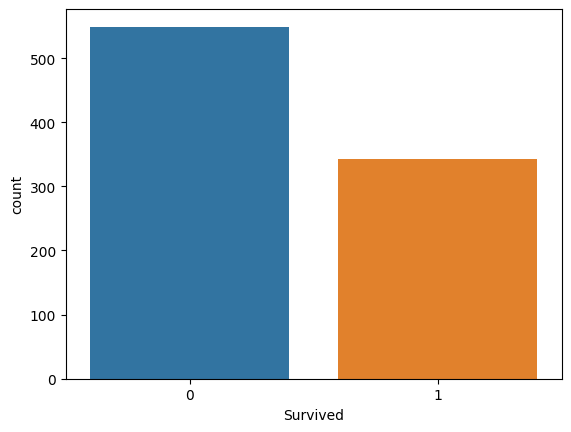

In [5]:
import seaborn as sns
sns.countplot(x='Survived', data=train)

<Axes: xlabel='Survived', ylabel='count'>

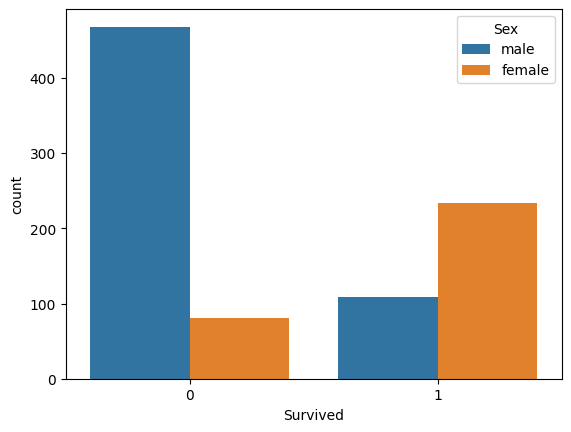

In [6]:
sns.countplot(x='Survived', hue='Sex', data=train)

The age of the people in the ticket class

📚 matplotlib: for data visualization

<Axes: xlabel='Pclass', ylabel='Age'>

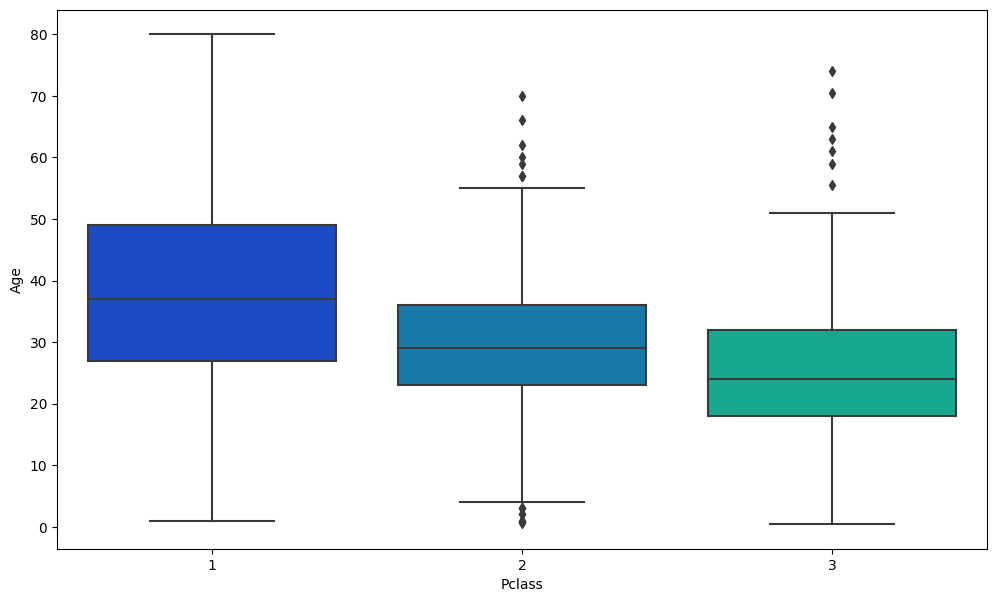

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

<Axes: xlabel='Survived', ylabel='count'>

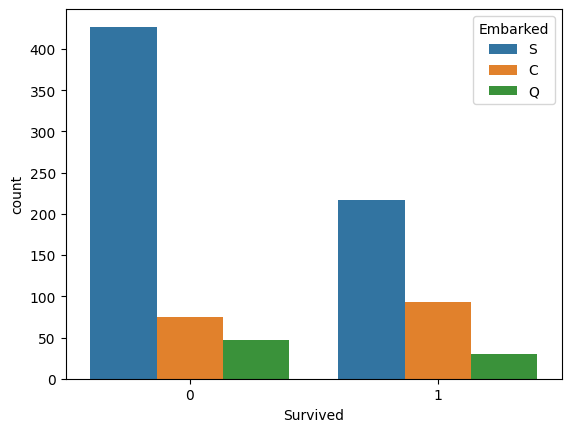

In [8]:
sns.countplot(x='Survived', hue='Embarked', data=train)

## Step3. Data Cleaning

In [9]:
def CleanData(df, ignorePassengerId = False):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Fare'].fillna(df['Fare'].mean(), inplace=True)
    
    if ignorePassengerId :
        df.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
    else:
        df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
    
CleanData(train)
CleanData(test, ignorePassengerId = True)

In [10]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [11]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,male,34.5,0,0,7.8292
1,893,3,female,47.0,1,0,7.0000
2,894,2,male,62.0,0,0,9.6875
3,895,3,male,27.0,0,0,8.6625
4,896,3,female,22.0,1,1,12.2875


## Step4. Feature Engineering & Data Preprocessing

In [12]:
def castColToInt(df, name):
    df[name] = df[name].astype(int)
    return df
    
def FeatureEngineering(df):
    sex = pd.get_dummies(df['Sex'], drop_first=True)
    df.drop(['Sex'], axis=1, inplace=True)
    df = pd.concat([df, sex], axis=1)
    
    castColToInt(df, 'Age')
    castColToInt(df, 'Fare')
    return df
    
train = FeatureEngineering(train)
test = FeatureEngineering(test)

In [13]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,0,3,22,1,0,7,1
1,1,1,38,1,0,71,0
2,1,3,26,0,0,7,0
3,1,1,35,1,0,53,0
4,0,3,35,0,0,8,1


In [14]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male
0,892,3,34,0,0,7,1
1,893,3,47,1,0,7,0
2,894,2,62,0,0,9,1
3,895,3,27,0,0,8,1
4,896,3,22,1,1,12,0


## Step5. Data Splitting

📚 sklearn (scikit-learn): for machine learning algorithms

In [15]:
from sklearn.model_selection import train_test_split

X = train.drop('Survived', axis=1)
y = train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

## Step6. Model Selection

in this article, I use the `Logistic Regression` algorithm.

You can use this library from GitHub to quickly benchmark in multiple algorithms

```bash
pip install lazypredict
```

[GitHub: lazypredict](https://github.com/shankarpandala/lazypredict)

[Documentation: lazypredict](https://lazypredict.readthedocs.io/en/latest/)

## Step7. Model Training

In [16]:
from sklearn.linear_model import LogisticRegression
logistReg = LogisticRegression(max_iter=1000)
logistReg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## Step8. Evaluation

In [17]:
from sklearn.metrics import accuracy_score
prediction = logistReg.predict(X_test)
accuracy = accuracy_score(y_test, prediction)
print("Accuracy: {:.2f}".format(accuracy))

Accuracy: 0.81


## Step9. Hyperparameter Tuning

In [18]:
from sklearn.model_selection import GridSearchCV
import warnings

warnings.filterwarnings('ignore')

hyperparameters = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'saga']
}

gridSeCV = GridSearchCV(logistReg, hyperparameters, scoring='accuracy', cv=20)
gridSeCV.fit(X_train, y_train)

prediction = gridSeCV.predict(X_test)
accuracy = accuracy_score(y_test, prediction)

print('Best params', gridSeCV.best_params_)
print('Best score', gridSeCV.best_score_)
print("Accuracy: {:.2f}".format(accuracy))

Best params {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best score 0.7981527093596059
Accuracy: 0.80


## Step10. Predict

In [19]:
passengerId = test['PassengerId']
test.drop(['PassengerId'], axis=1, inplace=True)

In [20]:
prediction = gridSeCV.predict(test)
submission = pd.DataFrame({'PassengerId': passengerId, 'Survived': prediction})
submission.to_csv('submission.csv', index=False)

Score: 0.77033

This project's full version and description are available on my GitHub page.

https://github.com/arashyeganeh/Machine-Learning/tree/main/Competition/Kaggle/Titanic%20-%20Machine%20Learning%20from%20Disaster